# Notas do curso Séries Temporais com Python

## Capítulo 6: Deep Learning em Séries Temporais

### 1. Introdução ao Keras

É uma API escrita sobre algumas bibliotecas de Deep Learning como o Thean, CNTK e Tensorflow.
Define-se um modelo no Keras a partir de uma sequência de camadas de redes neurais.

### 2. Redes neurais artificiais

RNA são baseadas na estrutura mais complexa encontrada na natureza: o cérebro humano. A unidade básica do cérebro é conhecida como neurônio e a conexão entre os neurônios é realizada através das sinapses realizadas pelos dendritos. Nessas conexões, impulsos elétricos podem ser enviados de um neuônio a outro criando uma rede de informação.

#### Redes neurais de perceptrons

Se trata da representação de um único neurônio:

https://raw.githubusercontent.com/Claudiooo/DeepLearningLearning/Group2/Images/perceptron_schematic_overview.png

Uma rede neural pode então ser construída a partir de várias camadas de perceptrons:

https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png

Nesta última figura, cada círculo representa um perceptron.

#### Características:

- Topologia: Estrutura de nós e camadas

    - Camadas
    
        Entrada: 1

        Saída: 1

        Oculta: $n$

    - Neurônios por camada
        
        Entrada: um para cada atributo/variável
        
        Saída: um para cada valor de classe (quando for um problema de classificação) ou apenas 1 para regressão

        Oculta: $\frac{N_{atributos} + N_{classes}}{2}$


- Arquitetura: Feed forward e back propagation

    - Feed forward é o processo pelo qual o resultado de uma camada passa para a próxima camada
    
    - Back propagation é o processo inverso: o resultado final é transmitido para as camadas anteriores a fim de otimizar as distribuições de pesos
    

- Epoch:

    É a quantidade de vezes que os dados de treino serão submetidos à rede neural a fim de permitir a otimização.

- Iteration:

    É cada passagem dos dados pela rede neural.

- Batch size:

    É a quantidade de dados que será transmitida à rede por iteração.

- Deep Learning:

    É um tipo de rede neural artifical onde há múltiplas camadas ocultas.

In [1]:
# Importando bibliotecas
import pandas as pd # leitura de dados
import numpy as np # cálculos numéricos precisos
from matplotlib import pyplot as plt # gráficos
from tensorflow.keras.models import Sequential # modelo de redes neurais
from tensorflow.keras.layers import Dense, LSTM # modelo de redes neurais
from sklearn.preprocessing import MinMaxScaler # pré-processamento dos dados
from math import * # funções matemáticas

C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [2]:
# Lendo dados
in_data = pd.read_csv("../Material/Dados/AirPassengers.csv", sep = ",", parse_dates = True, index_col = 0)

# Extraindo apenas os valores da série temporal
data = in_data.values

# Convertendo formato dos dados para uso no Keras
data = data.astype('float32')

# Separando dados de treino e teste
train = data[0:125,:]
test = data[125:,:]

# Iniciando semente de valores aleatórios para geração de pesos iniciais
np.random.seed(3)

In [3]:
# Função para pré-processar dados (não entendi o porquê dessa função)
def prepare_data(data, lags = 1):
    X, Y = [], []
    for row in range(len(data) - lags - 1):
        X.append(data[row:(row + lags), 0])
        Y.append(data[row + lags, 0])
    return(np.array(X), np.array(Y))

In [4]:
# Aplicando pré-processamento
lags = 1
X_tr, Y_tr = prepare_data(train, lags)
X_t, Y_t = prepare_data(test, lags)
Y_true = Y_t

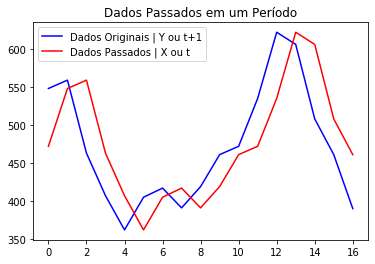

In [5]:
# Gráfico dos dados
plt.plot(Y_t, label = 'Dados Originais | Y ou t+1', color = 'blue')
plt.plot(X_t, label = 'Dados Passados | X ou t', color = 'red')
plt.legend(loc = 'upper left')
plt.title('Dados Passados em um Período')
plt.show()

In [6]:
# Criando modelo do keras
mod = Sequential()
mod.add(Dense(3, input_dim = lags, activation = 'relu'))
mod.add(Dense(1))

# Configurando função de erro e otimizador modelo
mod.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Treinando modelo
mod.fit(X_tr, Y_tr, epochs = 2000, batch_size = 2, verbose = 1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/2000
123/123 [==============================] - 0s 934us/sample - loss: 355837.2193
Epoch 2/2000
123/123 [==============================] - 0s 237us/sample - loss: 284518.2216
Epoch 3/2000
123/123 [==============================] - 0s 241us/sample - loss: 225257.1536
Epoch 4/2000
123/123 [==============================] - 0s 236us/sample - loss: 176429.2688
Epoch 5/2000
123/123 [==============================] - 0s 247us/sample - loss: 136532.3075
Epoch 6/2000
123/123 [==============================] - 0s 237us/sample - loss: 103955.6944
Epoch 7/2000
123/123 [==============================] - 0s 244us/sample - loss: 77951.7201
Epoch 8/2000
123/123 [==============================] - 0s 244us/sample - loss: 57199.6169
Epoch 9/2000
123/123 [==============================] - 0s 237us/sample - loss: 41118.3375
Epoch 10/2000
123/123 [==============================] - 

123/123 [==============================] - 0s 244us/sample - loss: 836.3103
Epoch 88/2000
123/123 [==============================] - 0s 245us/sample - loss: 838.1537
Epoch 89/2000
123/123 [==============================] - 0s 249us/sample - loss: 856.3337
Epoch 90/2000
123/123 [==============================] - 0s 249us/sample - loss: 853.1226
Epoch 91/2000
123/123 [==============================] - 0s 242us/sample - loss: 836.1568
Epoch 92/2000
123/123 [==============================] - 0s 248us/sample - loss: 845.8304
Epoch 93/2000
123/123 [==============================] - 0s 243us/sample - loss: 846.2755
Epoch 94/2000
123/123 [==============================] - 0s 245us/sample - loss: 849.1142
Epoch 95/2000
123/123 [==============================] - ETA: 0s - loss: 172.469 - 0s 245us/sample - loss: 844.8679
Epoch 96/2000
123/123 [==============================] - 0s 241us/sample - loss: 858.9279
Epoch 97/2000
123/123 [==============================] - 0s 241us/sample - loss: 856.073

123/123 [==============================] - 0s 251us/sample - loss: 836.6810
Epoch 178/2000
123/123 [==============================] - 0s 249us/sample - loss: 854.9557
Epoch 179/2000
123/123 [==============================] - 0s 242us/sample - loss: 843.9460
Epoch 180/2000
123/123 [==============================] - 0s 246us/sample - loss: 866.2764
Epoch 181/2000
123/123 [==============================] - 0s 253us/sample - loss: 838.2163
Epoch 182/2000
123/123 [==============================] - 0s 245us/sample - loss: 837.1609
Epoch 183/2000
123/123 [==============================] - 0s 246us/sample - loss: 837.0718
Epoch 184/2000
123/123 [==============================] - 0s 240us/sample - loss: 844.0917
Epoch 185/2000
123/123 [==============================] - 0s 240us/sample - loss: 854.0020
Epoch 186/2000
123/123 [==============================] - 0s 247us/sample - loss: 834.1979
Epoch 187/2000
123/123 [==============================] - 0s 246us/sample - loss: 841.4724
Epoch 188/2000

Epoch 267/2000
123/123 [==============================] - 0s 237us/sample - loss: 847.9096
Epoch 268/2000
123/123 [==============================] - 0s 243us/sample - loss: 833.2457
Epoch 269/2000
123/123 [==============================] - 0s 239us/sample - loss: 835.2755
Epoch 270/2000
123/123 [==============================] - 0s 246us/sample - loss: 831.5622
Epoch 271/2000
123/123 [==============================] - 0s 246us/sample - loss: 834.4901
Epoch 272/2000
123/123 [==============================] - 0s 247us/sample - loss: 857.4040
Epoch 273/2000
123/123 [==============================] - 0s 240us/sample - loss: 849.2198
Epoch 274/2000
123/123 [==============================] - 0s 245us/sample - loss: 849.4247
Epoch 275/2000
123/123 [==============================] - 0s 244us/sample - loss: 837.8299
Epoch 276/2000
123/123 [==============================] - 0s 237us/sample - loss: 848.0017
Epoch 277/2000
123/123 [==============================] - 0s 240us/sample - loss: 836.0008

123/123 [==============================] - 0s 237us/sample - loss: 831.8663
Epoch 358/2000
123/123 [==============================] - 0s 242us/sample - loss: 845.5586
Epoch 359/2000
123/123 [==============================] - 0s 238us/sample - loss: 834.3231
Epoch 360/2000
123/123 [==============================] - 0s 246us/sample - loss: 838.8247
Epoch 361/2000
123/123 [==============================] - 0s 242us/sample - loss: 840.0285
Epoch 362/2000
123/123 [==============================] - 0s 235us/sample - loss: 848.0711
Epoch 363/2000
123/123 [==============================] - ETA: 0s - loss: 4780.05 - 0s 237us/sample - loss: 839.1179
Epoch 364/2000
123/123 [==============================] - 0s 244us/sample - loss: 826.0469
Epoch 365/2000
123/123 [==============================] - 0s 233us/sample - loss: 851.3331
Epoch 366/2000
123/123 [==============================] - 0s 241us/sample - loss: 844.1269
Epoch 367/2000
123/123 [==============================] - 0s 242us/sample - los

123/123 [==============================] - 0s 251us/sample - loss: 866.4501
Epoch 447/2000
123/123 [==============================] - 0s 242us/sample - loss: 835.5703
Epoch 448/2000
123/123 [==============================] - 0s 242us/sample - loss: 834.8028
Epoch 449/2000
123/123 [==============================] - 0s 245us/sample - loss: 836.1980
Epoch 450/2000
123/123 [==============================] - 0s 242us/sample - loss: 839.1247
Epoch 451/2000
123/123 [==============================] - 0s 243us/sample - loss: 841.2614
Epoch 452/2000
123/123 [==============================] - 0s 249us/sample - loss: 833.9262
Epoch 453/2000
123/123 [==============================] - 0s 247us/sample - loss: 850.0619
Epoch 454/2000
123/123 [==============================] - 0s 245us/sample - loss: 834.1874
Epoch 455/2000
123/123 [==============================] - 0s 244us/sample - loss: 838.7385
Epoch 456/2000
123/123 [==============================] - 0s 235us/sample - loss: 828.5558
Epoch 457/2000

123/123 [==============================] - 0s 245us/sample - loss: 841.8892
Epoch 536/2000
123/123 [==============================] - 0s 242us/sample - loss: 838.8139
Epoch 537/2000
123/123 [==============================] - 0s 237us/sample - loss: 873.2026
Epoch 538/2000
123/123 [==============================] - 0s 246us/sample - loss: 830.5119
Epoch 539/2000
123/123 [==============================] - 0s 245us/sample - loss: 830.8146
Epoch 540/2000
123/123 [==============================] - 0s 248us/sample - loss: 834.6966
Epoch 541/2000
123/123 [==============================] - 0s 232us/sample - loss: 837.4880
Epoch 542/2000
123/123 [==============================] - 0s 243us/sample - loss: 832.0691
Epoch 543/2000
123/123 [==============================] - 0s 245us/sample - loss: 831.2743
Epoch 544/2000
123/123 [==============================] - 0s 246us/sample - loss: 842.4847
Epoch 545/2000
123/123 [==============================] - 0s 244us/sample - loss: 832.4910
Epoch 546/2000

123/123 [==============================] - 0s 246us/sample - loss: 829.6183
Epoch 626/2000
123/123 [==============================] - 0s 248us/sample - loss: 831.7504
Epoch 627/2000
123/123 [==============================] - 0s 243us/sample - loss: 829.7305
Epoch 628/2000
123/123 [==============================] - 0s 247us/sample - loss: 847.0668
Epoch 629/2000
123/123 [==============================] - 0s 249us/sample - loss: 846.8150
Epoch 630/2000
123/123 [==============================] - 0s 248us/sample - loss: 839.3412
Epoch 631/2000
123/123 [==============================] - 0s 251us/sample - loss: 840.7562
Epoch 632/2000
123/123 [==============================] - 0s 240us/sample - loss: 836.1922
Epoch 633/2000
123/123 [==============================] - 0s 240us/sample - loss: 832.5288
Epoch 634/2000
123/123 [==============================] - 0s 237us/sample - loss: 835.6846
Epoch 635/2000
123/123 [==============================] - 0s 236us/sample - loss: 837.7558
Epoch 636/2000

Epoch 715/2000
123/123 [==============================] - ETA: 0s - loss: 127.512 - 0s 245us/sample - loss: 837.7422
Epoch 716/2000
123/123 [==============================] - 0s 239us/sample - loss: 830.5420
Epoch 717/2000
123/123 [==============================] - 0s 242us/sample - loss: 828.8773
Epoch 718/2000
123/123 [==============================] - 0s 241us/sample - loss: 855.3608
Epoch 719/2000
123/123 [==============================] - 0s 236us/sample - loss: 848.4644
Epoch 720/2000
123/123 [==============================] - 0s 244us/sample - loss: 834.7546
Epoch 721/2000
123/123 [==============================] - 0s 244us/sample - loss: 833.3222
Epoch 722/2000
123/123 [==============================] - 0s 269us/sample - loss: 838.3196
Epoch 723/2000
123/123 [==============================] - 0s 259us/sample - loss: 832.5490
Epoch 724/2000
123/123 [==============================] - 0s 268us/sample - loss: 840.6274
Epoch 725/2000
123/123 [==============================] - 0s 253

123/123 [==============================] - 0s 243us/sample - loss: 844.1548
Epoch 805/2000
123/123 [==============================] - 0s 241us/sample - loss: 854.8737
Epoch 806/2000
123/123 [==============================] - 0s 235us/sample - loss: 827.4546
Epoch 807/2000
123/123 [==============================] - 0s 248us/sample - loss: 828.5296
Epoch 808/2000
123/123 [==============================] - 0s 240us/sample - loss: 839.8358
Epoch 809/2000
123/123 [==============================] - 0s 242us/sample - loss: 833.7615
Epoch 810/2000
123/123 [==============================] - 0s 241us/sample - loss: 827.8843
Epoch 811/2000
123/123 [==============================] - 0s 244us/sample - loss: 837.5656
Epoch 812/2000
123/123 [==============================] - 0s 244us/sample - loss: 834.1596
Epoch 813/2000
123/123 [==============================] - 0s 245us/sample - loss: 837.1731
Epoch 814/2000
123/123 [==============================] - 0s 248us/sample - loss: 844.9251
Epoch 815/2000

123/123 [==============================] - 0s 246us/sample - loss: 829.9610
Epoch 894/2000
123/123 [==============================] - 0s 245us/sample - loss: 830.0337
Epoch 895/2000
123/123 [==============================] - 0s 246us/sample - loss: 833.9311
Epoch 896/2000
123/123 [==============================] - 0s 244us/sample - loss: 824.8289
Epoch 897/2000
123/123 [==============================] - 0s 243us/sample - loss: 833.1932
Epoch 898/2000
123/123 [==============================] - 0s 237us/sample - loss: 849.9233
Epoch 899/2000
123/123 [==============================] - 0s 235us/sample - loss: 830.6676
Epoch 900/2000
123/123 [==============================] - 0s 241us/sample - loss: 835.8859
Epoch 901/2000
123/123 [==============================] - 0s 244us/sample - loss: 830.3868
Epoch 902/2000
123/123 [==============================] - 0s 243us/sample - loss: 834.6536
Epoch 903/2000
123/123 [==============================] - 0s 246us/sample - loss: 845.5069
Epoch 904/2000

123/123 [==============================] - 0s 261us/sample - loss: 845.6690
Epoch 983/2000
123/123 [==============================] - 0s 260us/sample - loss: 839.7338
Epoch 984/2000
123/123 [==============================] - 0s 266us/sample - loss: 832.1625
Epoch 985/2000
123/123 [==============================] - 0s 257us/sample - loss: 821.8271
Epoch 986/2000
123/123 [==============================] - 0s 251us/sample - loss: 831.0880
Epoch 987/2000
123/123 [==============================] - 0s 255us/sample - loss: 825.6429
Epoch 988/2000
123/123 [==============================] - 0s 256us/sample - loss: 826.8727
Epoch 989/2000
123/123 [==============================] - 0s 252us/sample - loss: 835.0155
Epoch 990/2000
123/123 [==============================] - 0s 248us/sample - loss: 834.9293
Epoch 991/2000
123/123 [==============================] - 0s 253us/sample - loss: 835.6748
Epoch 992/2000
123/123 [==============================] - 0s 257us/sample - loss: 831.8819
Epoch 993/2000

123/123 [==============================] - 0s 244us/sample - loss: 824.9762
Epoch 1071/2000
123/123 [==============================] - 0s 238us/sample - loss: 844.2302
Epoch 1072/2000
123/123 [==============================] - 0s 242us/sample - loss: 856.0519
Epoch 1073/2000
123/123 [==============================] - 0s 249us/sample - loss: 829.3565
Epoch 1074/2000
123/123 [==============================] - 0s 249us/sample - loss: 819.6988
Epoch 1075/2000
123/123 [==============================] - 0s 252us/sample - loss: 826.6325
Epoch 1076/2000
123/123 [==============================] - 0s 250us/sample - loss: 842.0515
Epoch 1077/2000
123/123 [==============================] - 0s 248us/sample - loss: 824.4533
Epoch 1078/2000
123/123 [==============================] - 0s 242us/sample - loss: 841.4013
Epoch 1079/2000
123/123 [==============================] - 0s 250us/sample - loss: 827.9402
Epoch 1080/2000
123/123 [==============================] - 0s 260us/sample - loss: 830.6152
Epoc

123/123 [==============================] - 0s 243us/sample - loss: 839.7980
Epoch 1159/2000
123/123 [==============================] - 0s 243us/sample - loss: 828.5363
Epoch 1160/2000
123/123 [==============================] - 0s 332us/sample - loss: 820.4980
Epoch 1161/2000
123/123 [==============================] - 0s 284us/sample - loss: 836.5284
Epoch 1162/2000
123/123 [==============================] - 0s 284us/sample - loss: 839.2012
Epoch 1163/2000
123/123 [==============================] - 0s 251us/sample - loss: 849.7662
Epoch 1164/2000
123/123 [==============================] - 0s 251us/sample - loss: 830.4818
Epoch 1165/2000
123/123 [==============================] - 0s 235us/sample - loss: 844.0307
Epoch 1166/2000
123/123 [==============================] - 0s 259us/sample - loss: 826.1695
Epoch 1167/2000
123/123 [==============================] - 0s 260us/sample - loss: 823.5171
Epoch 1168/2000
123/123 [==============================] - 0s 251us/sample - loss: 830.7168
Epoc

123/123 [==============================] - 0s 243us/sample - loss: 828.2790
Epoch 1247/2000
123/123 [==============================] - 0s 235us/sample - loss: 857.0621
Epoch 1248/2000
123/123 [==============================] - 0s 241us/sample - loss: 828.2283
Epoch 1249/2000
123/123 [==============================] - 0s 244us/sample - loss: 839.6543
Epoch 1250/2000
123/123 [==============================] - 0s 243us/sample - loss: 835.8812
Epoch 1251/2000
123/123 [==============================] - 0s 251us/sample - loss: 824.7345
Epoch 1252/2000
123/123 [==============================] - 0s 251us/sample - loss: 841.7792
Epoch 1253/2000
123/123 [==============================] - 0s 240us/sample - loss: 834.0267
Epoch 1254/2000
123/123 [==============================] - 0s 255us/sample - loss: 829.6322
Epoch 1255/2000
123/123 [==============================] - 0s 256us/sample - loss: 829.2439
Epoch 1256/2000
123/123 [==============================] - 0s 252us/sample - loss: 823.7324
Epoc

Epoch 1335/2000
123/123 [==============================] - 0s 255us/sample - loss: 832.6610
Epoch 1336/2000
123/123 [==============================] - 0s 224us/sample - loss: 828.3262
Epoch 1337/2000
123/123 [==============================] - ETA: 0s - loss: 1925.14 - 0s 242us/sample - loss: 836.1440
Epoch 1338/2000
123/123 [==============================] - 0s 253us/sample - loss: 837.6882
Epoch 1339/2000
123/123 [==============================] - 0s 251us/sample - loss: 830.5768
Epoch 1340/2000
123/123 [==============================] - 0s 235us/sample - loss: 843.5227
Epoch 1341/2000
123/123 [==============================] - 0s 235us/sample - loss: 844.1758
Epoch 1342/2000
123/123 [==============================] - 0s 238us/sample - loss: 822.9966
Epoch 1343/2000
123/123 [==============================] - 0s 251us/sample - loss: 837.3268
Epoch 1344/2000
123/123 [==============================] - 0s 244us/sample - loss: 838.5918
Epoch 1345/2000
123/123 [=============================

123/123 [==============================] - 0s 244us/sample - loss: 837.4269
Epoch 1424/2000
123/123 [==============================] - 0s 246us/sample - loss: 837.2585
Epoch 1425/2000
123/123 [==============================] - 0s 249us/sample - loss: 825.5767
Epoch 1426/2000
123/123 [==============================] - 0s 244us/sample - loss: 837.0310
Epoch 1427/2000
123/123 [==============================] - 0s 242us/sample - loss: 832.8532
Epoch 1428/2000
123/123 [==============================] - 0s 240us/sample - loss: 847.3606
Epoch 1429/2000
123/123 [==============================] - 0s 244us/sample - loss: 833.2281
Epoch 1430/2000
123/123 [==============================] - 0s 232us/sample - loss: 834.2811
Epoch 1431/2000
123/123 [==============================] - 0s 240us/sample - loss: 836.8185
Epoch 1432/2000
123/123 [==============================] - 0s 239us/sample - loss: 840.4048
Epoch 1433/2000
123/123 [==============================] - 0s 237us/sample - loss: 831.8467
Epoc

123/123 [==============================] - 0s 230us/sample - loss: 827.2642
Epoch 1512/2000
123/123 [==============================] - 0s 247us/sample - loss: 835.1347
Epoch 1513/2000
123/123 [==============================] - 0s 240us/sample - loss: 837.6669
Epoch 1514/2000
123/123 [==============================] - 0s 237us/sample - loss: 827.4933
Epoch 1515/2000
123/123 [==============================] - 0s 240us/sample - loss: 828.5775
Epoch 1516/2000
123/123 [==============================] - 0s 240us/sample - loss: 850.3370
Epoch 1517/2000
123/123 [==============================] - 0s 243us/sample - loss: 830.9203
Epoch 1518/2000
123/123 [==============================] - 0s 246us/sample - loss: 834.8974
Epoch 1519/2000
123/123 [==============================] - 0s 236us/sample - loss: 844.8046
Epoch 1520/2000
123/123 [==============================] - 0s 242us/sample - loss: 834.3763
Epoch 1521/2000
123/123 [==============================] - 0s 236us/sample - loss: 824.9256
Epoc

Epoch 1600/2000
123/123 [==============================] - 0s 243us/sample - loss: 840.9204
Epoch 1601/2000
123/123 [==============================] - 0s 241us/sample - loss: 830.4331
Epoch 1602/2000
123/123 [==============================] - 0s 234us/sample - loss: 821.1884
Epoch 1603/2000
123/123 [==============================] - 0s 236us/sample - loss: 824.0209
Epoch 1604/2000
123/123 [==============================] - 0s 240us/sample - loss: 820.5868
Epoch 1605/2000
123/123 [==============================] - 0s 242us/sample - loss: 833.7847
Epoch 1606/2000
123/123 [==============================] - 0s 243us/sample - loss: 826.0290
Epoch 1607/2000
123/123 [==============================] - 0s 243us/sample - loss: 836.3575
Epoch 1608/2000
123/123 [==============================] - 0s 235us/sample - loss: 841.3733
Epoch 1609/2000
123/123 [==============================] - 0s 251us/sample - loss: 822.6450
Epoch 1610/2000
123/123 [==============================] - 0s 243us/sample - los

123/123 [==============================] - 0s 240us/sample - loss: 833.2116
Epoch 1689/2000
123/123 [==============================] - 0s 243us/sample - loss: 825.6896
Epoch 1690/2000
123/123 [==============================] - 0s 246us/sample - loss: 825.4602
Epoch 1691/2000
123/123 [==============================] - 0s 246us/sample - loss: 828.5272
Epoch 1692/2000
123/123 [==============================] - 0s 243us/sample - loss: 829.2553
Epoch 1693/2000
123/123 [==============================] - 0s 237us/sample - loss: 837.1174
Epoch 1694/2000
123/123 [==============================] - 0s 239us/sample - loss: 827.0349
Epoch 1695/2000
123/123 [==============================] - 0s 245us/sample - loss: 833.9970
Epoch 1696/2000
123/123 [==============================] - 0s 241us/sample - loss: 845.5295
Epoch 1697/2000
123/123 [==============================] - 0s 244us/sample - loss: 837.1861
Epoch 1698/2000
123/123 [==============================] - 0s 243us/sample - loss: 848.9464
Epoc

Epoch 1777/2000
123/123 [==============================] - 0s 245us/sample - loss: 828.7866
Epoch 1778/2000
123/123 [==============================] - 0s 242us/sample - loss: 825.0226
Epoch 1779/2000
123/123 [==============================] - 0s 243us/sample - loss: 835.9498
Epoch 1780/2000
123/123 [==============================] - 0s 255us/sample - loss: 829.3352
Epoch 1781/2000
123/123 [==============================] - 0s 243us/sample - loss: 835.4787
Epoch 1782/2000
123/123 [==============================] - 0s 243us/sample - loss: 825.7364
Epoch 1783/2000
123/123 [==============================] - 0s 240us/sample - loss: 831.6123
Epoch 1784/2000
123/123 [==============================] - 0s 238us/sample - loss: 828.9791
Epoch 1785/2000
123/123 [==============================] - 0s 237us/sample - loss: 826.4345
Epoch 1786/2000
123/123 [==============================] - 0s 250us/sample - loss: 821.7771
Epoch 1787/2000
123/123 [==============================] - 0s 251us/sample - los

123/123 [==============================] - 0s 252us/sample - loss: 829.1745
Epoch 1866/2000
123/123 [==============================] - 0s 251us/sample - loss: 833.3447
Epoch 1867/2000
123/123 [==============================] - 0s 251us/sample - loss: 839.9552
Epoch 1868/2000
123/123 [==============================] - 0s 341us/sample - loss: 824.5935
Epoch 1869/2000
123/123 [==============================] - 0s 256us/sample - loss: 838.7860
Epoch 1870/2000
123/123 [==============================] - 0s 243us/sample - loss: 839.1806
Epoch 1871/2000
123/123 [==============================] - 0s 248us/sample - loss: 830.2247
Epoch 1872/2000
123/123 [==============================] - 0s 249us/sample - loss: 828.4557
Epoch 1873/2000
123/123 [==============================] - 0s 242us/sample - loss: 833.1130
Epoch 1874/2000
123/123 [==============================] - 0s 257us/sample - loss: 830.4696
Epoch 1875/2000
123/123 [==============================] - 0s 255us/sample - loss: 846.3631
Epoc

123/123 [==============================] - 0s 245us/sample - loss: 829.1635
Epoch 1954/2000
123/123 [==============================] - 0s 237us/sample - loss: 825.3091
Epoch 1955/2000
123/123 [==============================] - 0s 240us/sample - loss: 828.7662
Epoch 1956/2000
123/123 [==============================] - 0s 241us/sample - loss: 835.6323
Epoch 1957/2000
123/123 [==============================] - 0s 241us/sample - loss: 821.9407
Epoch 1958/2000
123/123 [==============================] - 0s 242us/sample - loss: 844.8768
Epoch 1959/2000
123/123 [==============================] - 0s 239us/sample - loss: 823.8359
Epoch 1960/2000
123/123 [==============================] - 0s 234us/sample - loss: 825.5299
Epoch 1961/2000
123/123 [==============================] - 0s 233us/sample - loss: 828.1894
Epoch 1962/2000
123/123 [==============================] - 0s 239us/sample - loss: 831.4754
Epoch 1963/2000
123/123 [==============================] - 0s 241us/sample - loss: 840.3705
Epoc

In [8]:
# Aferindo a qualidade do modelo treinado com os dados de treino
tr_score = mod.evaluate(X_tr, Y_tr, verbose = 0)
print("Pontuação do treino: {:.2f} MSE ({:.2f} RMSE)".format(tr_score, sqrt(tr_score)))

# Aferindo a qualidade do modelo treinado com os dados de teste
t_score = mod.evaluate(X_t, Y_t, verbose = 0)
print("Pontuação do teste: {:.2f} MSE ({:.2f} RMSE)".format(t_score, sqrt(t_score)))

Pontuação do treino: 816.41 MSE (28.57 RMSE)
Pontuação do teste: 3072.55 MSE (55.43 RMSE)


Repare como a qualidade com os dados de treino é muito maior do que aquela com os dados de teste. Isso pode indicar um overfitting do modelo aos dados de treino.

In [9]:
# Gerando previsões
tr_pred = mod.predict(X_tr)
t_pred = mod.predict(X_t)

# Preparando dados para desenhar gráfico
tr_pred_plt = np.empty_like(data)
tr_pred_plt[:,:] = np.nan
tr_pred_plt[lags:len(tr_pred) + lags, :] = tr_pred

t_pred_plt = np.empty_like(data)
t_pred_plt[:,:] = np.nan
t_pred_plt[len(tr_pred)+lags*2+1:len(t_pred) + lags, :] = t_pred

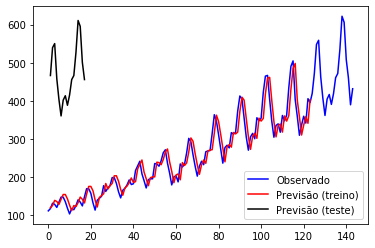

In [13]:
# Gráfico das previsões
plt.plot(data, label = 'Observado', color = 'blue')
plt.plot(tr_pred_plt, label = 'Previsão (treino)', color = 'red')
plt.plot(t_pred_plt, label = 'Previsão (teste)', color = 'black')
plt.legend(loc = 'best')
plt.show()